In [1]:
import os
os.chdir('/rds/general/user/ma11115/home/pl_temp_fit/') 

In [2]:
from pl_temp_fit import fit_experimental_plT
from pl_temp_fit.fit_experimental_plT import pl_trial
import matplotlib.pyplot as plt 

def plot_data(
     truemodel_pl, temperature_list, hws,title="Experimental Data"
):
    fig = plt.figure(constrained_layout=True,figsize=(15,10))
    subfig =fig.subfigures(1,2)
    ax = [subfig[0].subplots(1,1),subfig[1].subplots(1,1)]
    data_true_plot = truemodel_pl.reshape(len(hws), -1)/max(truemodel_pl.reshape(-1, 1))
    for i in range(len(temperature_list)):

        ax[0].plot(
            hws,
            data_true_plot[:, i],
            label="" + str(temperature_list[i]) + " K",
            #linestyle="--",
            color="C" + str(i),
            linewidth=2,
        )

        ax[1].plot(
            hws,
            data_true_plot[:, i]/max(data_true_plot[:, i]),
            label="" + str(temperature_list[i]) + " K",
            #linestyle="--",
            color="C" + str(i),
            linewidth=2,
        )
    ax[0].set_xlabel("Photon Energy (eV)")
    ax[0].set_ylabel("PL Intensity (arb. units)")
    ax[1].set_xlabel("Photon Energy (eV)")
    ax[1].set_ylabel("PL normalised (arb. units)")
    fig.suptitle(title)
    ax[0].legend(ncol=len(temperature_list), bbox_to_anchor=(1,-0.1
                                                             ), loc='upper center')
    fig.tight_layout()

/var/tmp/pbs.8571876.pbs/ipykernel_2911280/3570371520.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


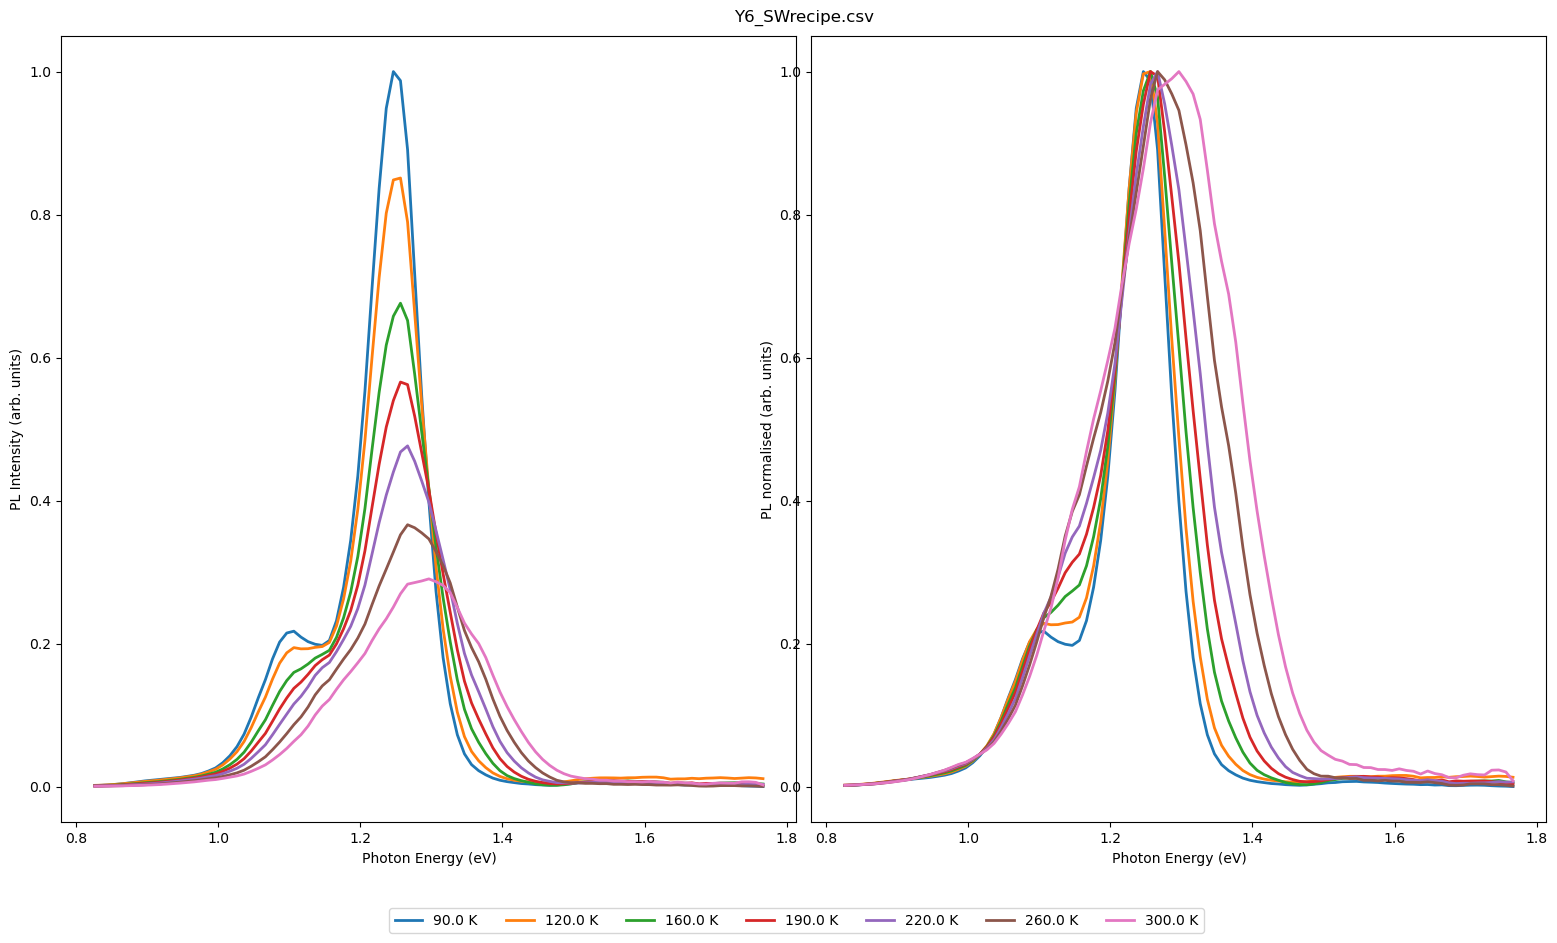

In [3]:
import glob
csv_files = glob.glob('experiemental_data/*.csv')
csv_name=csv_files[3]
truemodel_pl, temperature_list, hws = fit_experimental_plT.read_data(csv_name)
plot_data(truemodel_pl, temperature_list, hws,title=csv_name.split('/')[-1])
#


Running on PyMC v5.9.2
num_samples=10, num_tune=5, sigma=0.1, number_free_parameters=5, factor_relative_intensity_loss=10.0
data_file=experiemental_data/Y6_SWrecipe.csv
size of hw is (95,)
size of temperature_list is (7,)
calling the sampler


Only 5 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [E]
>Metropolis: [sigma_E]
>Metropolis: [LI]
>Metropolis: [L0]
>Metropolis: [H0]


/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
Sampling 4 chains for 2 tune and 5 draw iterations (8 + 20 draws total) took 27 seconds.
The number of samples is too small to check convergence reliably.
Only 10 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [E]
>Metropolis: [sigma_E]
>Metropolis: [LI]
>Metropolis: [L0]
>Metropolis: [H0]


/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
Sampling 4 chains for 5 tune and 10 draw iterations (20 + 40 draws total) took 56 seconds.
The number of samples is too small to check convergence reliably.
/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your d

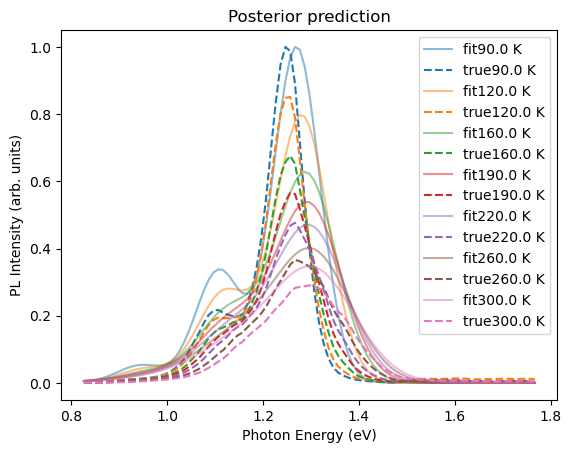

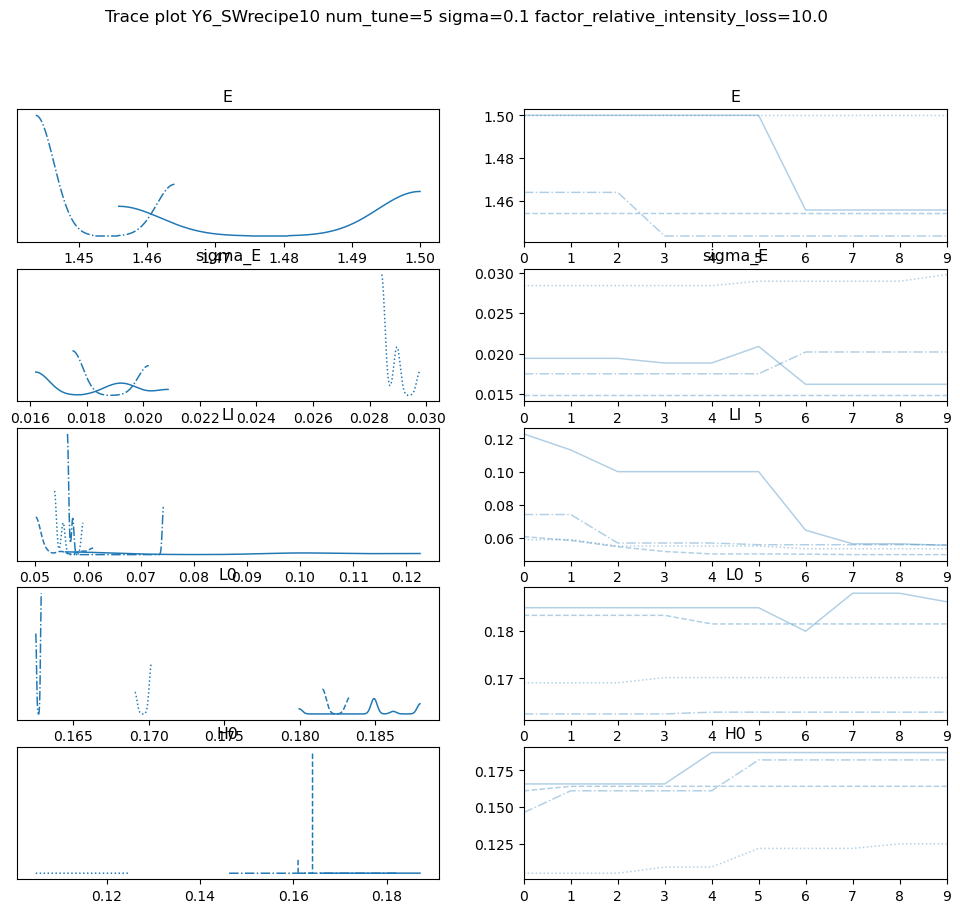

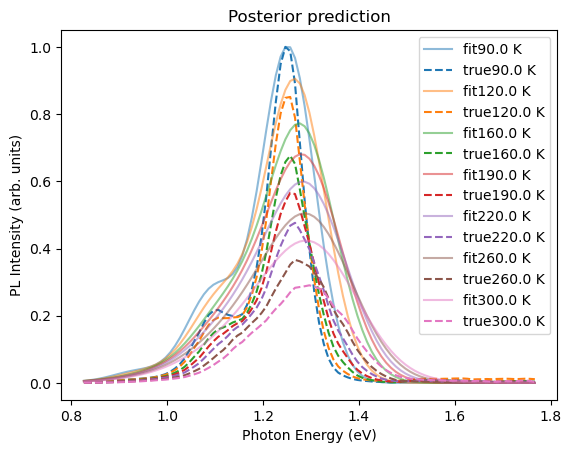

In [4]:
# test sampling method
%run src/pl_temp_fit/fit_experimental_plT.py --num_samples 10 --num_tune 5 --sigma 0.1 --data_file {csv_name} -f 10

In [5]:
# run job on HPC
for sigma in [0.1]:
    for factor_relative_intensity_loss in [ 20, 1]:
        script="#!/bin/bash \n"+\
            "#PBS -l walltime=07:59:01 \n"+\
            "#PBS -l select=1:ncpus=6:mem=5gb:avx=true \n"+\
            " \n"+\
            "cd /rds/general/user/ma11115/home/pl_temp_fit/ \n"+\
            "module load anaconda3/personal \n"+ \
            "source activate pymc_env     \n"+\
            f"python src/pl_temp_fit/fit_experimental_plT.py --num_samples 2000 --num_tune 1000 --sigma {sigma} --data_file {csv_name}  -f {factor_relative_intensity_loss} \n"
        #print(script) 
        with open(f"HPC_bash_script/Runexpfit_{csv_name.split('/')[-1]}.sh", 'wb') as f:
            f.write( bytes(script, 'utf-8'))  

        !qsub  -e ./cache -o ./cache HPC_bash_script/Runexpfit_{csv_name.split('/')[-1]}.sh

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
sh: which: line 1: syntax error: unexpected end of file


testing


In [5]:
from pl_temp_fit import fit_experimental_plT
csv_name = 'experiemental_data/IT_4F_temp.csv'

truemodel_pl, temperature_list, hws = fit_experimental_plT.read_data(csv_name)


In [19]:
truemodel_pl.shape[1]


8

In [21]:
for temp in range(0, truemodel_pl.shape[1]):
    print(temp)
    print(truemodel_pl[:, temp])

0
[5.16649570e-04 6.80582356e-04 8.41627527e-04 1.02364476e-03
 1.23792705e-03 1.49515192e-03 2.09282095e-03 2.69568309e-03
 3.25492283e-03 3.74476332e-03 4.25958200e-03 4.98294094e-03
 5.79311116e-03 6.78610148e-03 7.90715639e-03 9.39490996e-03
 1.11215280e-02 1.30252348e-02 1.50356350e-02 1.75425050e-02
 2.01001916e-02 2.28460266e-02 2.58065865e-02 2.84740793e-02
 3.21051262e-02 3.62011608e-02 4.13544297e-02 4.95369373e-02
 5.99635592e-02 7.03594739e-02 8.18023262e-02 9.53196084e-02
 1.08789676e-01 1.25282331e-01 1.42871671e-01 1.66227313e-01
 1.92359706e-01 2.18234505e-01 2.44925427e-01 2.63349292e-01
 2.84620410e-01 3.10124922e-01 3.29740330e-01 3.46257763e-01
 3.59195288e-01 3.69087205e-01 3.86372786e-01 4.14548067e-01
 4.57421298e-01 5.06469336e-01 5.55075816e-01 6.15601380e-01
 6.92007179e-01 7.81198232e-01 8.73410833e-01 9.50462275e-01
 9.96183391e-01 1.00000000e+00 9.58512191e-01 8.84638871e-01
 8.02984096e-01 7.19282537e-01 6.26190046e-01 5.23505599e-01
 4.20295516e-01 3.2441

In [18]:
truemodel_pl[:,1]

array([5.85495683e-04, 6.55481389e-04, 7.55157096e-04, 8.97995959e-04,
       1.08161082e-03, 1.28003008e-03, 1.84158555e-03, 2.35899792e-03,
       2.82576532e-03, 3.26637269e-03, 3.75307716e-03, 4.34664817e-03,
       5.05921559e-03, 5.88718697e-03, 6.80859540e-03, 8.01570139e-03,
       9.40962516e-03, 1.09440382e-02, 1.25507368e-02, 1.45578690e-02,
       1.65922460e-02, 1.87898668e-02, 2.12695658e-02, 2.35160018e-02,
       2.66649722e-02, 3.02106600e-02, 3.46104079e-02, 4.12549836e-02,
       4.95178927e-02, 5.76700756e-02, 6.68690416e-02, 7.76451271e-02,
       8.77930133e-02, 1.00046256e-01, 1.12892226e-01, 1.30021495e-01,
       1.49008549e-01, 1.67596874e-01, 1.87110834e-01, 2.00773520e-01,
       2.16664925e-01, 2.36725686e-01, 2.53630276e-01, 2.68930009e-01,
       2.81859942e-01, 2.92166669e-01, 3.08135003e-01, 3.31732798e-01,
       3.65215490e-01, 4.01348772e-01, 4.34634152e-01, 4.75043636e-01,
       5.25978546e-01, 5.85239818e-01, 6.45589195e-01, 6.94613332e-01,
      